In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import networkx as nx
import sys
sys.path.append("/usr/lib/python2.7/dist-packages")
import graph_tool.all as gt 
import numpy as np
import numpy.random as rn

# $$ Initialize~Graph $$

In [2]:
G=nx.read_edgelist("/home/andreasko/reachability/HIT/pig_trade_11-14_uvw_from_v0_2.dat",
                   create_using=nx.DiGraph(),
                   data=(('weight',int),),
                   nodetype=int)
ccs = nx.strongly_connected_component_subgraphs(G)
ccs = sorted(ccs, key=len, reverse=True)
G_GSCC = ccs[0]

g = gt.load_graph("HIT.xml.gz")
g.set_vertex_filter(None)
g.set_vertex_filter( gt.label_largest_component(g, directed=True) )
pw = g.edge_properties["weight"]
N = g.num_vertices()
print "number of nodes: ", N

number of nodes:  27806


# $$ PageRank $$

In [9]:
score, order = {}, {}
pm, it1 = gt.pagerank(g, damping=0.85, epsilon=1e-08, max_iter=200, ret_iter=True, weight=pw)
dic = {int(n): float(pm[n]) for n in g.vertices()}
order[0] = sorted(dic, key=dic.get, reverse=True)
score[0] = [dic[n] for n in order[0]]
print "nr of iterations: ", it1

dic = nx.pagerank_scipy(G_GSCC, alpha=0.85, max_iter=100, tol=1e-08, weight='weight')
order[1] = sorted(dic, key=dic.get, reverse=True)
score[1] = [dic[n] for n in order[1]]

print "The first 10 rankings are equal: ", np.array_equal(order[0][:10], order[1][:10])
print "deviations within a tolerance of 1e-6:", 100.*np.sum(np.isclose(score[0], score[1], rtol=1e-6) == False)/N,"%"
print "deviations within a tolerance of 1e-5:", 100.*np.sum(np.isclose(score[0], score[1], rtol=1e-5) == False)/N,"%"
print "deviations within a tolerance of 1e-4:", 100.*np.sum(np.isclose(score[0], score[1], rtol=1e-4) == False)/N,"%"

nr of iterations:  99
The first 10 rankings are equal:  True
deviations within a tolerance of 1e-6: 2.73322304539 %
deviations within a tolerance of 1e-5: 2.44911170251 %
deviations within a tolerance of 1e-4: 0.960224411997 %


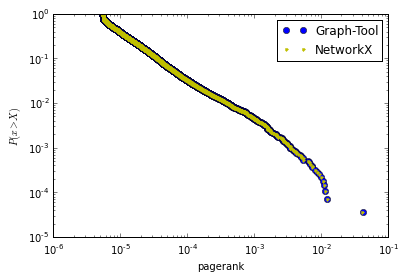

In [12]:
%matplotlib inline
plt.figure()
color = {0:'bo',1:'y.'}
for ii in range(2):
    values  = np.unique(score[ii])
    pdf = [np.count_nonzero(score[ii] == w) for w in values]
    cdf = np.cumsum(pdf).astype(float)
    cdf *= 1./cdf[-1]
    ccdf = 1.-cdf
    plt.loglog(values,ccdf,color[ii])
plt.xlabel('pagerank')
plt.ylabel(r'$P(x>X)$')
plt.legend(['Graph-Tool', 'NetworkX'])
plt.show()

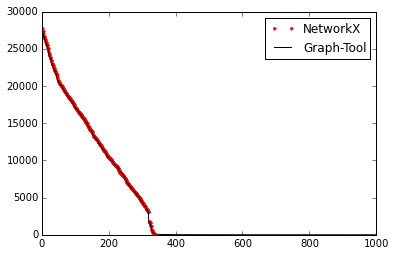

In [8]:
%matplotlib inline
size = np.load('pagerank_centrality_networkx_unweighted.npz')['size']
plt.figure()
plt.plot(range(len(size)),size,'r.')
size = np.load('pagerank_centrality_unweighted.npz')['size']
plt.plot(range(len(size)),size,'k-')
plt.legend(['NetworkX', 'Graph-Tool'])

# $$ Eigenvector $$

In [44]:
score, order = {}, {}
evalue, pm = gt.eigenvector(g, epsilon=1e-8, max_iter=200, weight=None)
dic = {int(n): float(pm[n]) for n in g.vertices()}
order[0] = sorted(dic, key=dic.get, reverse=True)
score[0] = [dic[n] for n in order[0]]
print "Largest Eigenvalue:", evalue

dic = nx.eigenvector_centrality_numpy(G_GSCC, weight=None)
order[1] = sorted(dic, key=dic.get, reverse=True)
score[1] = [dic[n] for n in order[1]]

print "The first 10 rankings are equal: ", np.array_equal(order[0][:10], order[1][:10])
print "deviations within a tolerance of 1e-6:", 100.*np.sum(np.isclose(score[0], score[1], rtol=1e-6) == False)/N,"%"
print "deviations within a tolerance of 1e-5:", 100.*np.sum(np.isclose(score[0], score[1], rtol=1e-5) == False)/N,"%"
print "deviations within a tolerance of 1e-4:", 100.*np.sum(np.isclose(score[0], score[1], rtol=1e-4) == False)/N,"%"

Largest Eigenvalue: 0.0372616858774
The first 10 rankings are equal:  True
deviations within a tolerance of 1e-6: 25.2427533626 %
deviations within a tolerance of 1e-5: 18.9527440121 %
deviations within a tolerance of 1e-4: 0.0 %


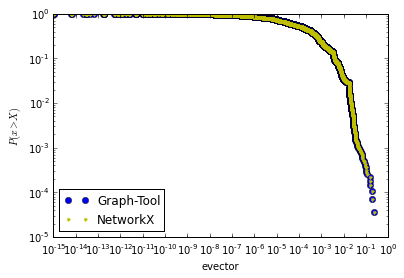

In [45]:
plt.figure()
color = {0:'bo',1:'y.'}
for ii in range(2):
    values  = np.unique(score[ii])
    pdf = [np.count_nonzero(score[ii] == w) for w in values]
    cdf = np.cumsum(pdf).astype(float)
    cdf *= 1./cdf[-1]
    ccdf = 1.-cdf
    plt.loglog(values,ccdf,color[ii])
plt.xlabel('evector')
plt.ylabel(r'$P(x>X)$')
plt.legend(['Graph-Tool', 'NetworkX'], loc='lower left')
plt.show()

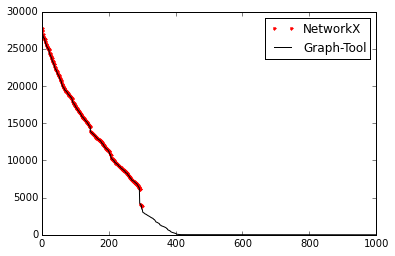

In [38]:
%matplotlib inline
size = np.load('eigenwert_centrality_networkx.npz')['size']
plt.figure()
plt.plot(range(len(size)),size,'r.')
size = np.load('eigenwert_centrality_unweighted.npz')['size']
plt.plot(range(len(size)),size,'k-')
plt.legend(['NetworkX', 'Graph-Tool'])

# $$ Katz $$

In [10]:
nx.katz_centrality(G_GSCC, alpha=0.1, beta=1.0, normalized=False, weight=None)

NetworkXError: Power iteration failed to converge in 1000 iterations.

In [9]:
score, order = {}, {}
pm = gt.katz(g, alpha=0.01, beta=None, epsilon=1e-04, max_iter=200, weight=pw)
dic = {int(n): float(pm[n]) for n in g.vertices()}
order[0] = sorted(dic, key=dic.get, reverse=True)
score[0] = [dic[n] for n in order[0]]

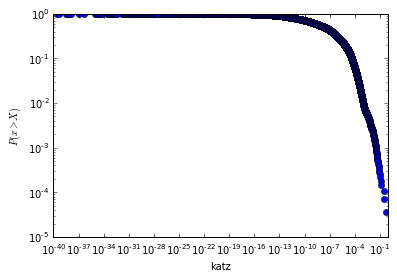

In [48]:
%matplotlib inline
plt.figure()
color = {0:'bo',1:'y.'}
for ii in range(1):
    values  = np.unique(score[ii])
    pdf = [np.count_nonzero(score[ii] == w) for w in values]
    cdf = np.cumsum(pdf).astype(float)
    cdf *= 1./cdf[-1]
    ccdf = 1.-cdf
    plt.loglog(values,ccdf,color[ii])
plt.xlabel('katz')
plt.ylabel(r'$P(x>X)$')
plt.show()

# $$ Remove~Nodes $$

In [3]:
from targeted_vacc import targeted_attack
G_unw=nx.read_edgelist("/home/andreasko/reachability/HIT/pig_trade_11-14_uvw_from_v0_2.dat",
                   create_using=nx.DiGraph(),
                   data=False,
                   nodetype=int)

In [11]:
re = targeted_attack(G_unw, nx.pagerank, recalculate=1, max_nodes=10, min_component_size=2)

--->  0  nodes removed. LSCC size:  27806
--->  1  nodes removed. LSCC size:  27542
--->  2  nodes removed. LSCC size:  27440
--->  3  nodes removed. LSCC size:  27373
--->  4  nodes removed. LSCC size:  27090
--->  5  nodes removed. LSCC size:  26879
--->  6  nodes removed. LSCC size:  26728
--->  7  nodes removed. LSCC size:  26616
--->  8  nodes removed. LSCC size:  26496
--->  9  nodes removed. LSCC size:  26290


In [5]:
size = np.array(re.values())
print size.shape
np.savez('pagerank_centrality_networkx_unweighted',size=size,N=1000)

(339,)
